# BANK LOAN ANALYSIS REPORT

# Import Libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import plotly.express as px
import squarify

In [4]:
px

<module 'plotly.express' from 'C:\\Users\\asus\\AppData\\Roaming\\Python\\Python311\\site-packages\\plotly\\express\\__init__.py'>

In [6]:
df = pd.read_excel("financial_loan.xlsx")

In [7]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [8]:
df.shape

(38576, 24)

In [9]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of data

In [10]:
df.shape

(38576, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

### Data types 

In [15]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [16]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [21]:
df['issue_date'].dtype

dtype('<M8[ns]')

In [22]:
df.isna()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38574,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Null values

In [23]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
19,1058060,MD,INDIVIDUAL,10+ years,NaN,D,OWN,2021-02-02,2021-05-16,2021-02-15,...,D1,36 months,Not Verified,40000.0,0.0957,176.51,0.1629,5000,13,6361
21,207910,FL,INDIVIDUAL,< 1 year,NaN,A,MORTGAGE,2021-01-08,2021-05-16,2021-02-10,...,A2,36 months,Not Verified,120000.0,0.0767,69.14,0.0743,2225,20,2508
31,744344,WA,INDIVIDUAL,6 years,NaN,B,MORTGAGE,2021-05-11,2021-05-16,2021-01-13,...,B4,36 months,Not Verified,48000.0,0.2357,197.83,0.1149,6000,27,3950
239,494363,NM,INDIVIDUAL,1 year,NaN,B,MORTGAGE,2021-03-10,2021-08-11,2021-09-11,...,B4,36 months,Not Verified,45000.0,0.1125,108.03,0.1099,3300,13,3712
245,781298,TX,INDIVIDUAL,9 years,NaN,B,MORTGAGE,2021-06-11,2021-05-16,2021-06-14,...,B2,36 months,Not Verified,70000.0,0.2309,278.85,0.1114,8500,19,10038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38305,617250,CO,INDIVIDUAL,5 years,NaN,B,RENT,2021-11-10,2021-10-13,2021-10-13,...,B2,36 months,Verified,48000.0,0.2110,348.69,0.0925,18000,25,12545
38311,543406,NY,INDIVIDUAL,1 year,NaN,B,RENT,2021-07-10,2021-05-12,2021-04-12,...,B2,36 months,Verified,96000.0,0.0084,130.49,0.1075,4000,14,4564
38314,375077,NY,INDIVIDUAL,3 years,NaN,B,RENT,2021-02-09,2021-12-10,2021-12-10,...,B4,36 months,Verified,73500.0,0.0405,497.46,0.1189,15000,9,16833
38326,781758,CA,INDIVIDUAL,5 years,NaN,C,RENT,2021-06-11,2021-04-16,2021-06-14,...,C4,36 months,Verified,60000.0,0.2024,104.91,0.1562,3000,23,3777


### Duplicates values

In [29]:
df.duplicated().sum()

0

### Outliers & Invalid Values

In [36]:
df = df[df['annual_income'] >= 0] 
df = df[(df['int_rate'] >= 0) & (df['int_rate'] <= 100)]
df = df[df['loan_amount'] > 0]

### String Cleaning

In [44]:
df[df['last_payment_date'] < df['issue_date']].count()
df['year'] = df['issue_date'].dt.year
df['month'] = df['issue_date'].dt.month

### MTD Total Loan Applications

In [47]:
df['id'].count()


38576

In [48]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,year,month
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.0,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533,2021.0,7.167073
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000,2021.0,1.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000,2021.0,4.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000,2021.0,7.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000,2021.0,10.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000,2021.0,12.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777,0.0,3.398998


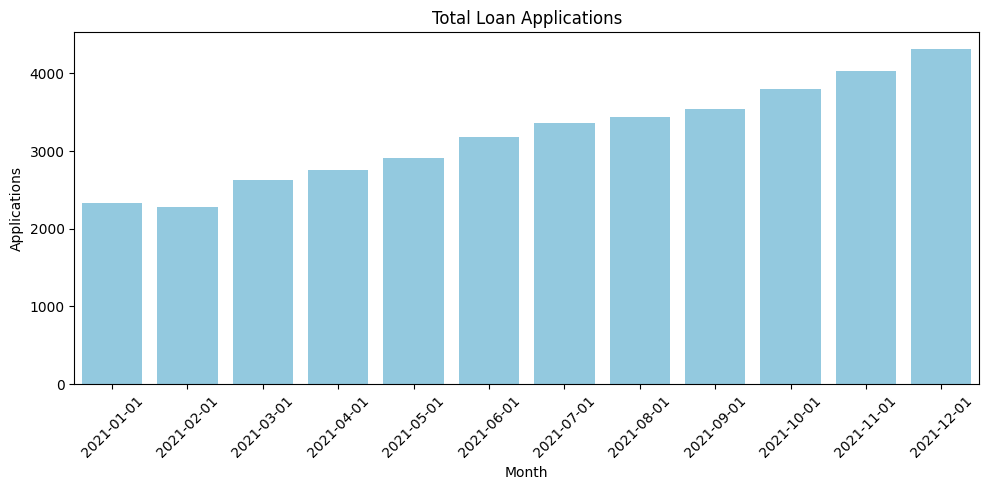

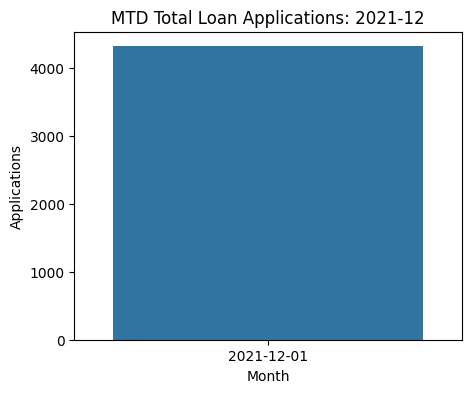

In [114]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['month'] = df['issue_date'].dt.to_period('M')
monthly_counts = df.groupby('month').size().reset_index(name='loan_count')
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()
last_month = monthly_counts['month'].max()
last_month_data = monthly_counts[monthly_counts['month'] == last_month]
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='loan_count', data=monthly_counts, color="skyblue")
plt.title("Total Loan Applications")
plt.xlabel("Month")
plt.ylabel("Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(5,4))
sns.barplot(x='month', y='loan_count', data=last_month_data)
plt.title(f"MTD Total Loan Applications: {last_month.strftime('%Y-%m')}")
plt.xlabel("Month")
plt.ylabel("Applications")
plt.show()

### MTD Total Funded Amount

In [85]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'year', 'month'],
      dtype='object')

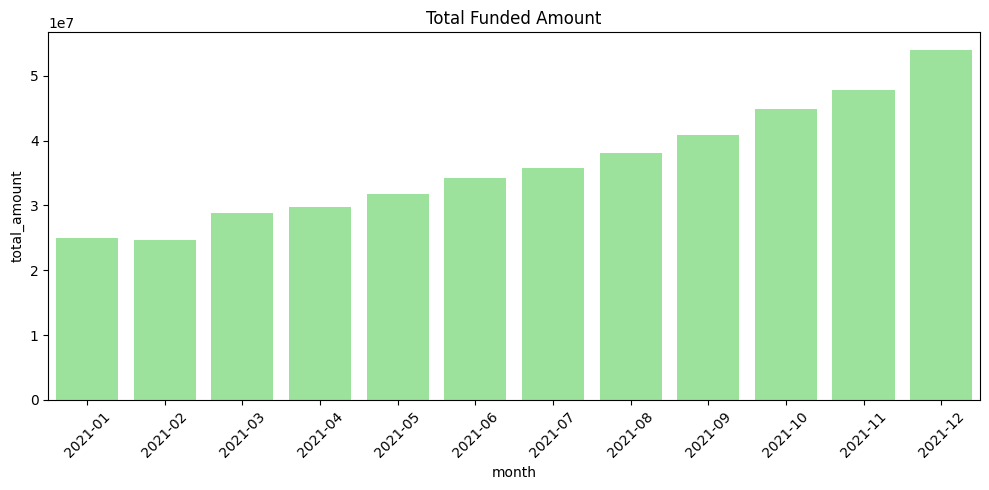

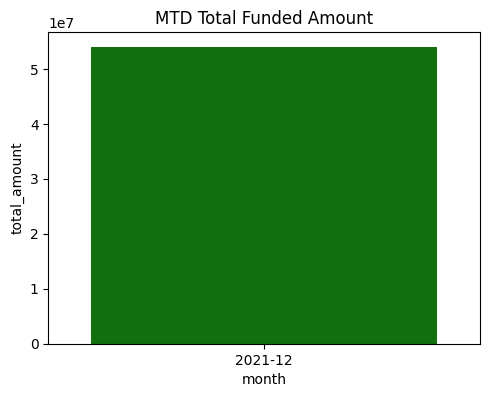

In [259]:
monthly_sum = df.groupby('month')['loan_amount'].sum().reset_index(name='total_amount')
plt.figure(figsize=(10,5))
sns.barplot(x='month' , y='total_amount' , data = monthly_sum , color = 'lightgreen')
plt.title('Total Funded Amount')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(5,4))
sns.barplot(x='month' , y = 'total_amount' , data = monthly_sum[monthly_sum['month'] == monthly_sum['month'].max()],color='green')
plt.tight_layout()
plt.title('MTD Total Funded Amount')
plt.show()

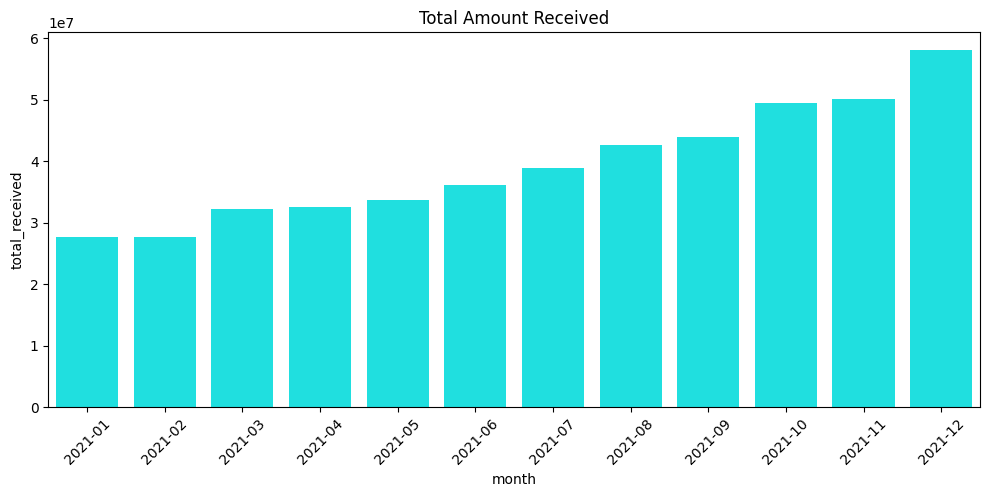

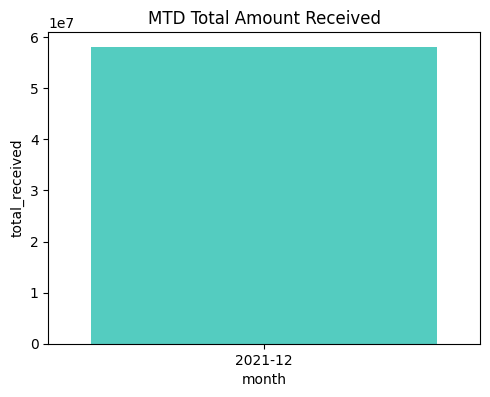

In [266]:
monthly_recieved_sum = df.groupby('month')['total_payment'].sum().reset_index(name='total_received') 
plt.figure(figsize=(10,5))
sns.barplot(x='month', y = 'total_received', data = monthly_recieved_sum , color = 'aqua')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Total Amount Received')
plt.show()
plt.figure(figsize=(5,4))
sns.barplot(x='month',y='total_received',data = monthly_recieved_sum[monthly_recieved_sum['month'] == monthly_recieved_sum['month'].max()],color='turquoise')
plt.tight_layout()
plt.title('MTD Total Amount Received')
plt.show()

 ##### Average Debt To Income Ratio 
 ##### Average Interest rate 

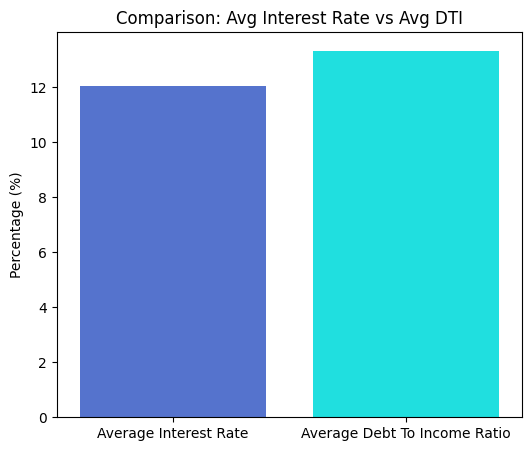

In [137]:
average_interest_rate = df['int_rate'].mean()*100
average_dti = df['dti'].mean()*100
avg_data = pd.DataFrame({
    'Metric': ['Average Interest Rate', 'Average Debt To Income Ratio'],
    'Value': [average_interest_rate, average_dti]
})
plt.figure(figsize=(6,5))
sns.barplot(x='Metric',hue = 'Metric', y='Value', data=avg_data, palette=['royalblue','cyan'])
plt.title("Comparison: Avg Interest Rate vs Avg DTI")
plt.ylabel("Percentage (%)")
plt.xlabel("")
plt.show()

## Good loan Metrics

In [162]:
good_loan = df[df['loan_status'].isin(['Fully Paid','Current'])]
good_loan_application = good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_received = good_loan['total_payment'].sum()
good_loan_percentage = (good_loan_application / df['id'].count())*100
print("Good Loan Applications${:.2f}M".format(good_loan_application))
print("Good Loan Funded Amount: ${:.2f}M".format(good_loan_funded_amount))
print("Good Loan Total Received: ${:.2f}M".format(good_loan_received))
print("Percentage of Good Loan Applications: ${:.2f}M".format(good_loan_percentage))

Good Loan Applications$33243.00M
Good Loan Funded Amount: $370224850.00M
Good Loan Total Received: $435786170.00M
Percentage of Good Loan Applications: $86.18M


## Bad loan Metrics

In [163]:
bad_loan = df[df['loan_status'].isin(['Charged Off'])]
bad_loan_application = bad_loan['id'].count()
bad_loan_funded_amount = bad_loan['loan_amount'].sum()
bad_loan_received = bad_loan['total_payment'].sum()
bad_loan_percentage = (bad_loan_application / df['id'].count())*100
print("Bad Loan Applications${:.2f}M".format(bad_loan_application))
print("Bad Loan Funded Amount: ${:.2f}M".format(bad_loan_funded_amount))
print("Bad Loan Total Received: ${:.2f}M".format(bad_loan_received))
print("Percentage of Bad Loan Applications: ${:.2f}M".format(bad_loan_percentage))

Bad Loan Applications$5333.00M
Bad Loan Funded Amount: $65532225.00M
Bad Loan Total Received: $37284763.00M
Percentage of Bad Loan Applications: $13.82M


### Monthly Trends By Issue Date For Total Funded Amount

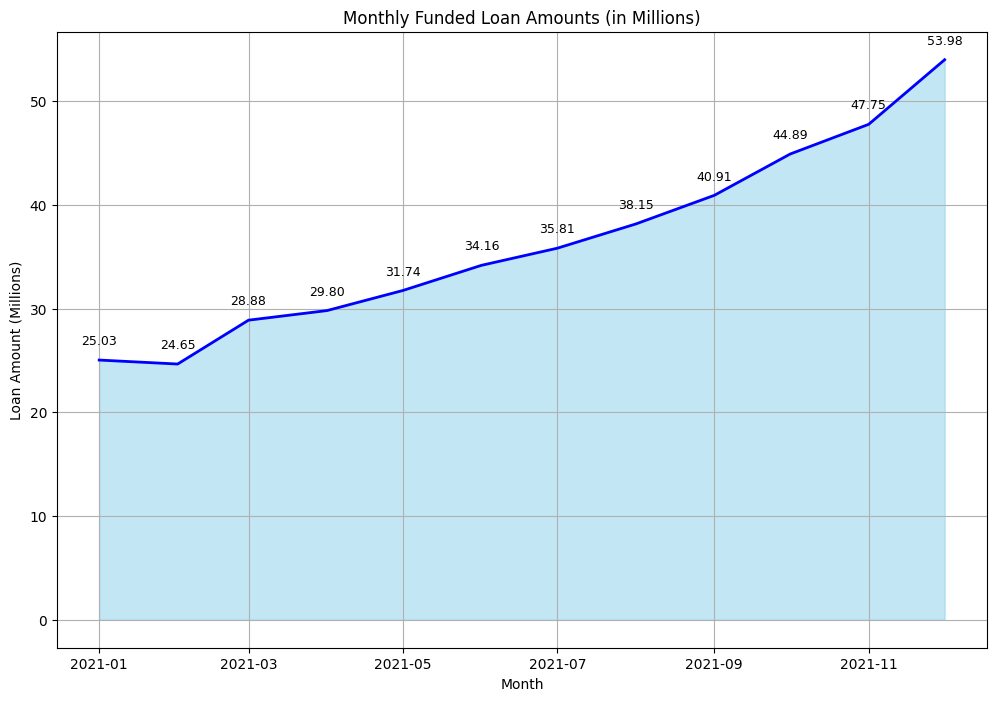

In [208]:
df['month'] = pd.to_datetime(df['issue_date']).dt.to_period('M')

monthly_funded = (
    df.sort_values('issue_date')
      .groupby('month', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)
monthly_funded['month'] = monthly_funded['month'].dt.to_timestamp()
plt.figure(figsize=(12,8))
plt.fill_between(
    monthly_funded['month'],
    monthly_funded['loan_amount_millions'],
    color='skyblue',
    alpha = 0.5,
)
plt.plot(
    monthly_funded['month'],
    monthly_funded['loan_amount_millions'],
    color='blue',
    linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(
        row['month'],                          
        row['loan_amount_millions'] + 1.2,   
        f"{row['loan_amount_millions']:.2f}", 
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

plt.title("Monthly Funded Loan Amounts (in Millions)")
plt.ylabel("Loan Amount (Millions)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


### Monthly Trends By Issue Date For Total Amount Received

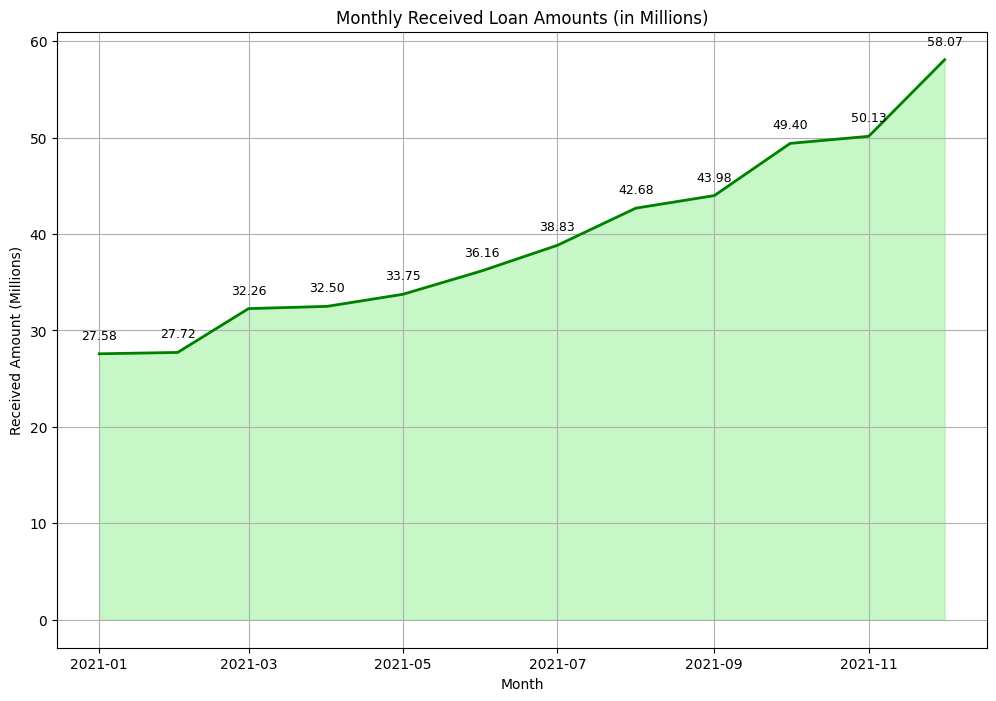

In [209]:
df['month'] = pd.to_datetime(df['issue_date']).dt.to_period('M')

monthly_funded = (
    df.sort_values('issue_date')
      .groupby('month', sort=False)['total_payment']
      .sum()
      .div(1_000_000)
      .reset_index(name='received_amount_millions')
)
monthly_funded['month'] = monthly_funded['month'].dt.to_timestamp()
plt.figure(figsize=(12,8))
plt.fill_between(
    monthly_funded['month'],
    monthly_funded['received_amount_millions'],
    color='lightgreen',
    alpha=0.5
)
plt.plot(
    monthly_funded['month'],
    monthly_funded['received_amount_millions'],
    color='green',
    linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(
        row['month'],                          
        row['received_amount_millions'] + 1.2,   
        f"{row['received_amount_millions']:.2f}", 
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

plt.title("Monthly Received Loan Amounts (in Millions)")
plt.ylabel("Received Amount (Millions)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


### Regional Analysis By State For Total Funded Amount

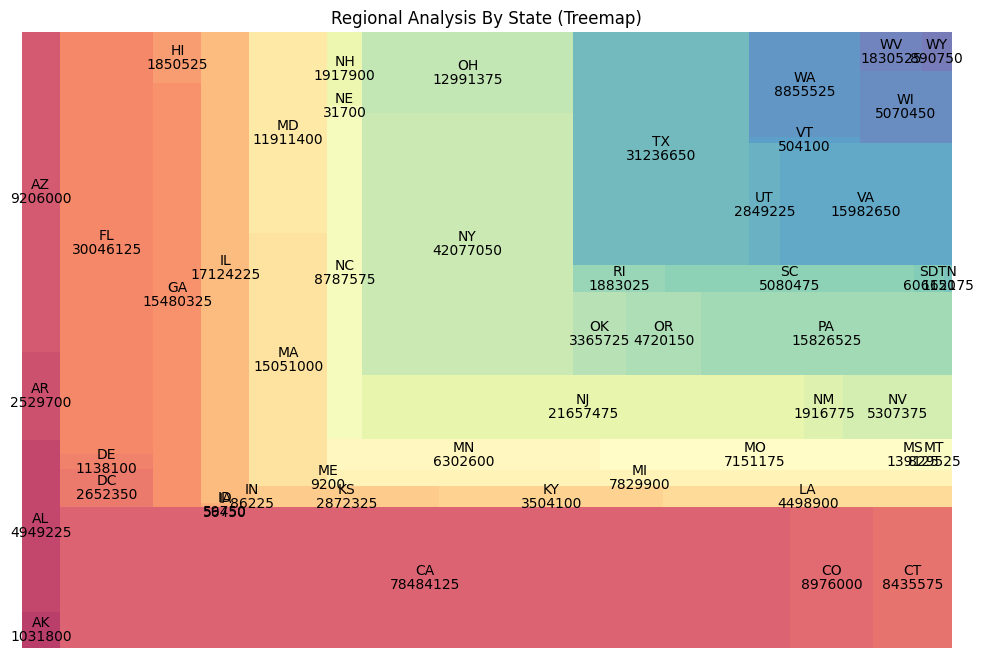

In [241]:
plt.figure(figsize=(12,8))
squarify.plot(
    sizes=state_funding['state_total_funded_amount'],
    label=state_funding['address_state'],
    value=state_funding['state_total_funded_amount'],
    alpha=0.8,
    color=sns.color_palette("Spectral", len(state_funding))
    
)
plt.title("Regional Analysis By State (Treemap)")
plt.axis("off")
plt.show()


### Loan Term Analysis By Total Funded Amount

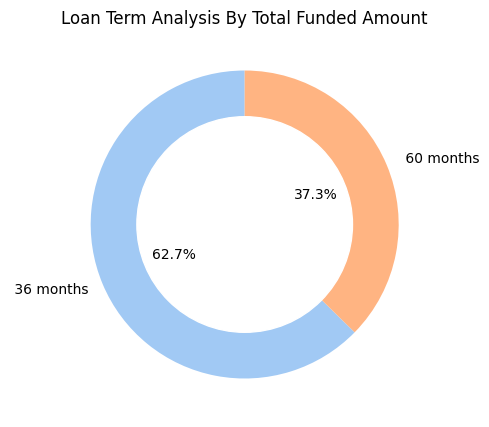

In [252]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000
plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct  = '%1.1f%%',
    startangle = 90,
    colors = sns.color_palette("pastel"),
    pctdistance=0.5,    
    labeldistance=1.1
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color = 'white'))
plt.title('Loan Term Analysis By Total Funded Amount')
plt.show()